## Inicializações, mkdir

In [ ]:
#!pip install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:


!mkdir -p MNIST/trn_img/
!mkdir -p MNIST/trn_lab/
!mkdir -p MNIST/models/crs5/0/
!mkdir -p MNIST/models/crs5/1/
!mkdir -p MNIST/models/crs5/2/
!mkdir -p MNIST/models/crs5/3/
!mkdir -p MNIST/models/crs5/4/
!mkdir -p MNIST/trn_img_f/
!mkdir -p MNIST/trn_lab_f/

!mkdir -p FashionMNIST/trn_img/
!mkdir -p FashionMNIST/trn_lab/
!mkdir -p FashionMNIST/models/crs5/0/
!mkdir -p FashionMNIST/models/crs5/1/
!mkdir -p FashionMNIST/models/crs5/2/
!mkdir -p FashionMNIST/models/crs5/3/
!mkdir -p FashionMNIST/models/crs5/4/
!mkdir -p FashionMNIST/trn_img_f/
!mkdir -p FashionMNIST/trn_lab_f/

!mkdir -p CIFAR10/trn_img/
!mkdir -p CIFAR10/trn_lab/
!mkdir -p CIFAR10/models/crs5/0/
!mkdir -p CIFAR10/models/crs5/1/
!mkdir -p CIFAR10/models/crs5/2/
!mkdir -p CIFAR10/models/crs5/3/
!mkdir -p CIFAR10/models/crs5/4/
!mkdir -p CIFAR10/trn_img_f/
!mkdir -p CIFAR10/trn_lab_f/

!mkdir -p SVHN/trn_img/
!mkdir -p SVHN/trn_lab/
!mkdir -p SVHN/models/crs5/0//models/crs5/0/
!mkdir -p SVHN/models/crs5/1//models/crs5/1/
!mkdir -p SVHN/models/crs5/2//models/crs5/2/
!mkdir -p SVHN/models/crs5/3//models/crs5/3/
!mkdir -p SVHN/models/crs5/4//models/crs5/4/
!mkdir -p SVHN/trn_img_f/
!mkdir -p SVHN/trn_lab_f/


!mkdir -p CelebA/trn_img/
!mkdir -p CelebA/trn_lab/
!mkdir -p CelebA/models/crs5/0//models/crs5/0/
!mkdir -p CelebA/models/crs5/1//models/crs5/1/
!mkdir -p CelebA/models/crs5/2//models/crs5/2/
!mkdir -p CelebA/models/crs5/3//models/crs5/3/
!mkdir -p CelebA/models/crs5/4//models/crs5/4/
!mkdir -p CelebA/trn_img_f/
!mkdir -p CelebA/trn_lab_f/


In [ ]:
import collections
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
import numpy as np
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors
import time
import os
from torchvision import datasets #Import MNIST from torchvision
import torchvision.transforms as transforms
print(torch.version.cuda) #10.1
t3 = time.time()

11.3


## Argumentos

In [ ]:
##############################################################################
"""args for AE"""

#MNIST e FMNIST n_channel = 1 e n_z = 300
#Cifar10 e SVHN n_channel = 3 e n_z = 600

args = {}
args['dim_h'] = 64         # factor controlling size of hidden layers
args['n_channel'] = 1 #1  ou 3    # number of channels in the input data 

args['n_z'] = 300 #300 ou 600     # number of dimensions in latent space. 

args['sigma'] = 1.0        # variance in n_z
args['lambda'] = 0.01      # hyper param for weight of discriminator loss
args['lr'] = 0.0002        # learning rate for Adam optimizer .000
args['epochs'] = 10       # how many epochs to run for
args['batch_size'] = 100   # batch size for SGD
args['save'] = True        # save weights at each epoch of training if True
args['train'] = True       # train networks if True, else load networks from

args['dataset'] = 'mnist' # 'mnist' ou 'fashionmnist' ou 'cifar10' ou 'svhn'  # specify which dataset to use



## Importando os datasets 

In [ ]:
###############################################################################


#NOTE: Download the training ('.../0_trn_img.txt') and label files 
# ('.../0_trn_lab.txt').  Place the files in directories (e.g., ../MNIST/trn_img/
# and /MNIST/trn_lab/).  Originally, when the code was written, it was for 5 fold
#cross validation and hence there were 5 files in each of the 
#directories.  Here, for illustration, we use only 1 training and 1 label
#file (e.g., '.../0_trn_img.txt' and '.../0_trn_lab.txt').

## transformation





if( args['dataset']== 'mnist'):
  transform = transforms.Compose([transforms.ToTensor(), transforms.Resize(size=(28,28))])
  dataset_torch = datasets.MNIST(root='./', train=True, download=True, transform=transform)
  dir_model = 'MNIST'
  print("Mnist")
elif( args['dataset']== 'fashionmnist'):
  transform = transforms.Compose([transforms.ToTensor(), transforms.Resize(size=(28,28))])
  dataset_torch = datasets.FashionMNIST(root='./', train=True, download=True, transform=transform)
  dir_model = 'FashionMNIST'
  print("FashionMNIST")
elif( args['dataset']== 'cifar10'):
  transform = transforms.Compose( [transforms.ToTensor(), transforms.Resize(size=(32,32))])
  dataset_torch = datasets.CIFAR10(root='./', train=True, download=True, transform=transform)
  dir_model = 'CIFAR10'
  print("CIFAR10")
elif( args['dataset']== 'svhn'):
  transform = transforms.Compose( [transforms.ToTensor(), transforms.Resize(size=(32,32))])
  dataset_torch = datasets.SVHN(root='./', train=True, download=True, transform=transform)
  dir_model = 'SVHN'
  print("SVHN")


'''

!mv MNIST/raw/train-images-idx3-ubyte MNIST/trn_img/0_trn_img.txt
!mv MNIST/raw/train-labels-idx1-ubyte MNIST/trn_lab/0_trn_lab.txt
dtrnimg = 'MNIST/trn_img/'
dtrnlab = 'MNIST/trn_lab/'

## download and load training dataset
#trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
#                                          shuffle=True, num_workers=2)
'''

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Mnist


"\n\n!mv MNIST/raw/train-images-idx3-ubyte MNIST/trn_img/0_trn_img.txt\n!mv MNIST/raw/train-labels-idx1-ubyte MNIST/trn_lab/0_trn_lab.txt\ndtrnimg = 'MNIST/trn_img/'\ndtrnlab = 'MNIST/trn_lab/'\n\n## download and load training dataset\n#trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,\n#                                          shuffle=True, num_workers=2)\n"

In [ ]:
dataset_torch

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=None)
           )

## Classes Encoder e Decoder 

In [ ]:
##############################################################################


## create encoder model and decoder model
class Encoder(nn.Module):
    def __init__(self, args):
        super(Encoder, self).__init__()

        self.n_channel = args['n_channel']
        self.dim_h = args['dim_h']
        self.n_z = args['n_z']
        
        # convolutional filters, work excellent with image data
        self.conv = nn.Sequential(
            nn.Conv2d(self.n_channel, self.dim_h, 4, 2, 1, bias=False),
            #nn.ReLU(True),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(self.dim_h, self.dim_h * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.dim_h * 2),
            #nn.ReLU(True),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(self.dim_h * 2, self.dim_h * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(self.dim_h * 4),
            #nn.ReLU(True),
            nn.LeakyReLU(0.2, inplace=True),
            
            
            nn.Conv2d(self.dim_h * 4, self.dim_h * 8, 4, 2, 1, bias=False),
            
            #3d and 32 by 32
            #nn.Conv2d(self.dim_h * 4, self.dim_h * 8, 4, 1, 0, bias=False),
            
            nn.BatchNorm2d(self.dim_h * 8), # 40 X 8 = 320
            #nn.ReLU(True),
            nn.LeakyReLU(0.2, inplace=True) )#,
            #nn.Conv2d(self.dim_h * 8, 1, 2, 1, 0, bias=False))
            #nn.Conv2d(self.dim_h * 8, 1, 4, 1, 0, bias=False))
        # final layer is fully connected
        self.fc = nn.Linear(self.dim_h * (2 ** 3), self.n_z)
        

    def forward(self, x):
        #print('enc')
        #print('input ',x.size()) #torch.Size([100, 3,32,32])
        x = self.conv(x)
        
        x = x.squeeze()
        #print('aft squeeze ',x.size()) #torch.Size([128, 320])
        #aft squeeze  torch.Size([100, 320])
        x = self.fc(x)
        #print('out ',x.size()) #torch.Size([128, 20])
        #out  torch.Size([100, 300])
        return x


class Decoder(nn.Module):
    def __init__(self, args):
        super(Decoder, self).__init__()

        self.n_channel = args['n_channel']
        self.dim_h = args['dim_h']
        self.n_z = args['n_z']

        # first layer is fully connected
        self.fc = nn.Sequential(
            nn.Linear(self.n_z, self.dim_h * 8 * 7 * 7),
            nn.ReLU())

        # deconvolutional filters, essentially inverse of convolutional filters
        self.deconv = nn.Sequential(
            nn.ConvTranspose2d(self.dim_h * 8, self.dim_h * 4, 4),
            nn.BatchNorm2d(self.dim_h * 4),
            nn.ReLU(True),
            nn.ConvTranspose2d(self.dim_h * 4, self.dim_h * 2, 4),
            nn.BatchNorm2d(self.dim_h * 2),
            nn.ReLU(True),
            nn.ConvTranspose2d(self.dim_h * 2, 1, 4, stride=2),
            #nn.Sigmoid())
            nn.Tanh())

    def forward(self, x):
        #print('dec')
        #print('input ',x.size())
        x = self.fc(x)
        x = x.view(-1, self.dim_h * 8, 7, 7)
        x = self.deconv(x)
        return x

##############################################################################
"""set models, loss functions"""
# control which parameters are frozen / free for optimization
def free_params(module: nn.Module):
    for p in module.parameters():
        p.requires_grad = True

def frozen_params(module: nn.Module):
    for p in module.parameters():
        p.requires_grad = False









## Treinamento do Encoder/Decoder - Main

In [ ]:
#%%time
'''
ids = os.listdir(dtrnimg)
idtri_f = [os.path.join(dtrnimg, image_id) for image_id in ids]
print(idtri_f)

ids = os.listdir(dtrnlab)
idtrl_f = [os.path.join(dtrnlab, image_id) for image_id in ids]
print(idtrl_f)
'''

for i in range(1):
#for i in range(len(ids)):
    print()
    print(i)
    encoder = Encoder(args)
    decoder = Decoder(args)

    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(device)
    decoder = decoder.to(device)
    encoder = encoder.to(device)

    train_on_gpu = torch.cuda.is_available()

    #decoder loss function
    criterion = nn.MSELoss()
    criterion = criterion.to(device)
    
#    trnimgfile = idtri_f[i]
#    trnlabfile = idtrl_f[i]
    
#    print(trnimgfile)
#    print(trnlabfile)
#    dec_x = trnimgfile
#    dec_y = trnlabfile

#    dec_x = 
#    dec_y = MNISTtorch.targets
#   print('train imgs before reshape ',dec_x.shape) 
#   print('train labels ',dec_y.shape) 
#   print(collections.Counter(dec_y))
#   dec_x = dec_x.reshape(dec_x.shape[0],1,28,28)   
#   print('train imgs after reshape ',dec_x.shape) 

    dl_batch_size = batch_size=dataset_torch.__len__()
    batch_size = args['batch_size']
    num_workers = 0

    #torch.Tensor returns float so if want long then use torch.tensor
 #   tensor_x = dec_x
 #   tensor_y = MNISTtorch.target
 #   mnist_bal = TensorDataset(tensor_x,tensor_y) 
    train_loader = torch.utils.data.DataLoader(dataset_torch, batch_size=batch_size,shuffle=True,num_workers=num_workers)
    
    ## Carregar dataset na memória
    dl_aux = torch.utils.data.DataLoader(dataset_torch, batch_size=dl_batch_size,shuffle=True,num_workers=num_workers)
    
    dec_x, dec_y = next(iter(dl_aux))

    del dl_aux

    classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

    best_loss = np.inf

    t0 = time.time()
    if args['train']:
        enc_optim = torch.optim.Adam(encoder.parameters(), lr = args['lr'])
        dec_optim = torch.optim.Adam(decoder.parameters(), lr = args['lr'])
    
        for epoch in range(args['epochs']):
            train_loss = 0.0
            tmse_loss = 0.0
            tdiscr_loss = 0.0
            # train for one epoch -- set nets to train mode
            encoder.train()
            decoder.train()
        
            for images,labs in train_loader:
            
                # zero gradients for each batch
                encoder.zero_grad()
                decoder.zero_grad()
                #print(images)
                images, labs = images.to(device), labs.to(device)
                #print('images ',images.size()) 
                labsn = labs.detach().cpu().numpy()
                #print('labsn ',labsn.shape, labsn)
            
                # run images
                z_hat = encoder(images)
            
                x_hat = decoder(z_hat) #decoder outputs tanh
                #print('xhat ', x_hat.size())
                #print(x_hat)

                #Reconstruction Loss
                mse = criterion(x_hat,images)
                #print('mse ',mse)
                
                       
                resx = []
                resy = []

                #Randomly sample classes            
                tc = np.random.randint(10)
                #tc = 9
                #print("Class:", tc)

                #Randomly sample nsamp instances of that class
                xbeg = dec_x[dec_y == tc]
                ybeg = dec_y[dec_y == tc] 
                xlen = len(xbeg)
                #print("xlen", xlen)
                nsamp = min(xlen, 100)
                ind = np.random.choice(list(range(len(xbeg))),nsamp,replace=False)
                xclass = xbeg[ind]
                yclass = ybeg[ind]
            
                xclen = len(xclass)
                #print('xclen ',xclen)
                xcminus = np.arange(1,xclen)
                #print('minus ',xcminus.shape,xcminus)
                
                xcplus = np.append(xcminus,0)
                #print('xcplus ',xcplus)
                xcnew = (xclass[[xcplus],:])
                #xcnew = np.squeeze(xcnew)
                xcnew = xcnew.reshape(xcnew.shape[1],xcnew.shape[2],xcnew.shape[3],xcnew.shape[4])
                #print('xcnew ',xcnew.shape)
            
                xcnew = torch.Tensor(xcnew)
                xcnew = xcnew.to(device)
            
                #Encode xclass to feature space
                xclass = torch.Tensor(xclass)
                xclass = xclass.to(device)
                xclass = encoder(xclass)
                #print('xclass ',xclass.shape) 
            
                xclass = xclass.detach().cpu().numpy()
            
                xc_enc = (xclass[[xcplus],:])
                xc_enc = np.squeeze(xc_enc)
                #print('xc enc ',xc_enc.shape)
            
                xc_enc = torch.Tensor(xc_enc)
                xc_enc = xc_enc.to(device)

                #Decode
                ximg = decoder(xc_enc)
                
                #Penalty Loss 
                mse2 = criterion(ximg,xcnew)
            
                comb_loss = mse2 + mse
                comb_loss.backward()
            
                enc_optim.step()
                dec_optim.step()
            
                train_loss += comb_loss.item()*images.size(0)
                tmse_loss += mse.item()*images.size(0)
                tdiscr_loss += mse2.item()*images.size(0)
            
                 
            # print avg training statistics 
            train_loss = train_loss/len(train_loader)
            tmse_loss = tmse_loss/len(train_loader)
            tdiscr_loss = tdiscr_loss/len(train_loader)
            print('Epoch: {} \tTrain Loss: {:.6f} \tmse loss: {:.6f} \tmse2 loss: {:.6f}'.format(epoch,
                    train_loss,tmse_loss,tdiscr_loss))
            
        
#########################5 Way Cross Validation#################################       
           #store the best encoder and decoder models
            #here, /crs5 is a reference to 5 way cross validation, but is not
            #necessary for illustration purposes
            if train_loss < best_loss:
                print('Saving..')
                path_enc = dir_model+'/models/crs5/' \
                    + str(i) + '/bst_enc.pth'
                path_dec = dir_model+'/models/crs5/' \
                    + str(i) + '/bst_dec.pth'
             
                torch.save(encoder.state_dict(), path_enc)
                torch.save(decoder.state_dict(), path_dec)
        
                best_loss = train_loss
################################################################################        
        
        #in addition, store the final model (may not be the best) for
        #informational purposes
        path_enc = dir_model+'/models/crs5/' \
            + str(i) + '/f_enc.pth'
        path_dec = dir_model+'/models/crs5/' \
            + str(i) + '/f_dec.pth'
        print(path_enc)
        print(path_dec)
        torch.save(encoder.state_dict(), path_enc)
        torch.save(decoder.state_dict(), path_dec)
        print()
              
    t1 = time.time()
    print('total time(min): {:.2f}'.format((t1 - t0)/60))             
 
t4 = time.time()
print('final time(min): {:.2f}'.format((t4 - t3)/60))


0
cuda


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)


Epoch: 0 	Train Loss: 7.771546 	mse loss: 3.368561 	mse2 loss: 4.402985
Saving..
Epoch: 1 	Train Loss: 1.909579 	mse loss: 0.854511 	mse2 loss: 1.055067
Saving..
Epoch: 2 	Train Loss: 1.295266 	mse loss: 0.587805 	mse2 loss: 0.707462
Saving..
Epoch: 3 	Train Loss: 0.991637 	mse loss: 0.454814 	mse2 loss: 0.536823
Saving..
Epoch: 4 	Train Loss: 0.848326 	mse loss: 0.388970 	mse2 loss: 0.459356
Saving..
Epoch: 5 	Train Loss: 0.741259 	mse loss: 0.341960 	mse2 loss: 0.399299
Saving..
Epoch: 6 	Train Loss: 0.661914 	mse loss: 0.307095 	mse2 loss: 0.354819
Saving..
Epoch: 7 	Train Loss: 0.597877 	mse loss: 0.280400 	mse2 loss: 0.317476
Saving..
Epoch: 8 	Train Loss: 0.550815 	mse loss: 0.259415 	mse2 loss: 0.291399
Saving..
Epoch: 9 	Train Loss: 0.520420 	mse loss: 0.243281 	mse2 loss: 0.277139
Saving..
MNIST/models/crs5/0/f_enc.pth
MNIST/models/crs5/0/f_dec.pth

total time(min): 8.59
final time(min): 10.49


## Generate Samples - SMOTE/Adasyn

In [ ]:
##############################################################################

def biased_get_class1(c):
    
    xbeg = dec_x[dec_y == c]
    ybeg = dec_y[dec_y == c]
    
    return xbeg, ybeg
    #return xclass, yclass
'''


'''

def G_SM1(X, y,n_to_sample,cl):

    
    # fitting the model
    n_neigh = 5 + 1
    knn = NearestNeighbors(n_neighbors=n_neigh, n_jobs=1)
    knn.fit(X)
    dist, ind = knn.kneighbors(X)

    # generating samples
    base_indices = np.random.choice(list(range(len(X))),n_to_sample)
    neighbor_indices = np.random.choice(list(range(1, n_neigh)),n_to_sample)

    X_base = X[base_indices]
    X_neighbor = X[ind[base_indices, neighbor_indices]]

    samples = X_base + np.multiply(np.random.rand(n_to_sample,1),
            X_neighbor - X_base)

    #use 10 as label because 0 to 9 real classes and 1 fake/smoted = 10
    return samples, [cl]*n_to_sample

#############################################################################



In [ ]:
def adasyn(X, y,xclass, yclass,  cl, m_major, m_minor, beta=1):
  '''
  Inputs:
  X: conjunto de dados ordenados por classe (Da classe 0 a 9)
  y : conjunto de labels ordenados por classe (Da classe 0 a 9)
  xclass: conjunto de dados da classe alvo
  yclass: conjunto de labels da classe alvo
  cl : classe alvo
  m_major : número de instâncias da classe majoritária
  m_minor : número de instâncias da classe minoritária (alvo)
  beta : parâmetros que controla quantas instâncias são geradas. Default=1
  '''
  #Número de neighbors
  K = 5
  d= m_major/m_minor
  #if(d>threshold) acaba aqui
  G = (m_major-m_minor)*beta
  # fitting the model


  clf = neighbors.KNeighborsClassifier()
  clf.fit(X, y)
  Ri = []
  Minority_per_xi = []
  print("Deu fit")
  for i in range(m_minor):
    # Returns indices of the closest neighbours, and return it as a list
    xi = xclass[i, :].reshape(1, -1)
    # Returns indices of the closest neighbours, and return it as a list
    neighbours = clf.kneighbors(xi, n_neighbors=K, return_distance=False)[0]
    delta=0
    for j in neighbours:
      if(y[j]!=0):
        delta+=1
        
    Ri.append(delta/K)

    #print("Delta:", delta)
    minority = []
    for index in neighbours:
            # Shifted back 1 because indices start at 0
            if y[index]==cl:
                minority.append(index)
    Minority_per_xi.append(minority)
  print("Calculei Ri")
  Ri_norm = []
  for ri in Ri:
    ri_norm = ri / sum(Ri)
    Ri_norm.append(ri_norm)
  print("Normalizei Ri")
  #assert (sum(Rhat_i) > 0.99)
  Gi = []
  for r in Ri_norm:
    gi = round(r * G)
    Gi.append(int(gi)) 
  syn_data=[]
  syn_number =0
  print("Calculei Gi")
  for i in range(m_minor):
    #gerar classes
    neighbor_indices = np.random.choice(list(range(1, K+1)),Gi[i])
    for j in range(Gi[i]):
        # If the minority list is not empty
        if Minority_per_xi[i]:
            index = np.random.choice(Minority_per_xi[i])
            xzi = X[index, :].reshape(1, -1)
            si = xi + (xzi - xi) * np.random.uniform(0, 1)
            syn_data.append(si)
            syn_number+=1
  print("Gerei os exemplos")
  return syn_data, [cl]*syn_number

In [ ]:
!mkdir MNIST/trn_img_f/

mkdir: cannot create directory ‘MNIST/trn_img_f/’: File exists


In [ ]:
!mkdir MNIST/trn_lab_f/

mkdir: cannot create directory ‘MNIST/trn_lab_f/’: File exists


In [ ]:
!ls

## Generate Samples - Main

In [ ]:
np.printoptions(precision=5,suppress=True)
#%time
'''
dtrnimg = '.../0_trn_img.txt'
dtrnlab = '.../0_trn_lab.txt'

ids = os.listdir(dtrnimg)
idtri_f = [os.path.join(dtrnimg, image_id) for image_id in ids]
print(idtri_f)

ids = os.listdir(dtrnlab)
idtrl_f = [os.path.join(dtrnlab, image_id) for image_id in ids]
print(idtrl_f)
'''
#path on the computer where the models are stored
modpth = './' +dir_model+'/models/crs5/'

encf = []
decf = []
for p in range(5):
    enc = modpth + '/' + str(p) + '/bst_enc.pth'
    dec = modpth + '/' + str(p) + '/bst_dec.pth'
    encf.append(enc)
    decf.append(dec)
    #print(enc)
    #print(dec)
    #print()

for m in range(1):
    print(m)
    '''
    trnimgfile = idtri_f[m]
    trnlabfile = idtrl_f[m]
    print(trnimgfile)
    print(trnlabfile)
    dec_x = np.loadtxt(trnimgfile) 
    dec_y = np.loadtxt(trnlabfile)

    print('train imgs before reshape ',dec_x.shape) #(44993, 3072) 45500, 3072)
    print('train labels ',dec_y.shape) #(44993,) (45500,)

    dec_x = dec_x.reshape(dec_x.shape[0],1,28,28)

    print('decy ',dec_y.shape)
    print(collections.Counter(dec_y))
    
    print('train imgs after reshape ',dec_x.shape) #(45000,3,32,32)
    '''
    dl_batch_size = batch_size=dataset_torch.__len__()
    batch_size = 128
    num_workers = 0

    #torch.Tensor returns float so if want long then use torch.tensor
 #   tensor_x = dec_x
 #   tensor_y = MNISTtorch.target
 #   mnist_bal = TensorDataset(tensor_x,tensor_y) 
    train_loader = torch.utils.data.DataLoader(dataset_torch, 
        batch_size=batch_size,shuffle=True,num_workers=num_workers)
    
    ## Carregar dataset na memória
    dl_aux = torch.utils.data.DataLoader(dataset_torch, 
        batch_size=dl_batch_size,shuffle=True,num_workers=num_workers)
    
    dec_x, dec_y = next(iter(dl_aux))

    del dl_aux

    classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

    best_loss = np.inf

    
    #generate some images 
    train_on_gpu = torch.cuda.is_available()
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    
    path_enc = encf[m]
    path_dec = decf[m]

    encoder = Encoder(args)
    encoder.load_state_dict(torch.load(path_enc), strict=False)
    encoder = encoder.to(device)

    decoder = Decoder(args)
    decoder.load_state_dict(torch.load(path_dec), strict=False)
    decoder = decoder.to(device)

    encoder.eval()
    decoder.eval()

    #imbal = [4500, 2000, 1000, 800, 600, 500, 400, 250, 150, 80]
    if(args['dataset'] =='mnist' or args['dataset'] =='fashionmnist'):imbal = [4000, 2000, 1000, 750, 500, 350, 200, 100, 60, 40]

    resx = []
    resy = []
    xclasses=[]
    yclasses=[]
    #Gerar um conjunto com todas as classes ordenadas
    for i in range(0,10):
      xclass, yclass = biased_get_class1(i)

          
      #encode xclass to feature space
      xclass = torch.Tensor(xclass)
      xclass = xclass.to(device)
      xclass = encoder(xclass)

          
      xclass = xclass.detach().cpu().numpy()
      xclasses.append(xclass)
      yclasses.append(yclass)
    
    allClasses = np.concatenate(xclasses)
    allY = np.concatenate(yclasses)

    #Skipando a classe 1
    for i in range(1,10):
        xclass, yclass = xclasses[i], yclasses[i]
        print("Len yclass", len(yclass))
        n = imbal[0] - imbal[i]
        #xsamp, ysamp = G_SM1(xclass,yclass,n,i)
        xsamp, ysamp = adasyn(allClasses, allY, xclass, yclass,  i, imbal[0], imbal[1], beta=1)
        print(len(ysamp))

        ysamp = np.array(ysamp)

    
        """to generate samples for resnet"""   
        xsamp = torch.Tensor(xsamp)
        xsamp = xsamp.to(device)
        #xsamp = xsamp.view(xsamp.size()[0], xsamp.size()[1], 1, 1)
        ximg = decoder(xsamp)

        ximn = ximg.detach().cpu().numpy()
        #ximn = np.expand_dims(ximn,axis=1)

        resx.append(ximn)
        resy.append(ysamp)

    resx1 = np.vstack(resx)
    resy1 = np.hstack(resy)

    #resx1 = np.squeeze(resx1)


    resx1 = resx1.reshape(resx1.shape[0],-1)

    
    dec_x1 = dec_x.reshape(dec_x.shape[0],-1)

    combx = np.vstack((resx1,dec_x1))
    comby = np.hstack((resy1,dec_y))


    ifile = './'+dir_model+'/trn_img_f/' + \
        str(m) + '_trn_img.txt'
    np.savetxt(ifile, combx)

    
    lfile = './'+dir_model+'/trn_lab_f/' + \
        str(m) + '_trn_lab.txt'
    np.savetxt(lfile,comby) 
    print()

t1 = time.time()
print('final time(min): {:.2f}'.format((t1 - t0)/60))

0
Len yclass 6742
Deu fit
Calculei Ri
Normalizei Ri
Calculei Gi
Gerei os exemplos
2000
Len yclass 5958
Deu fit
Calculei Ri
Normalizei Ri
Calculei Gi
Gerei os exemplos
1974
Len yclass 6131
Deu fit
Calculei Ri
Normalizei Ri
Calculei Gi
Gerei os exemplos
1994
Len yclass 5842
Deu fit
Calculei Ri
Normalizei Ri
Calculei Gi
Gerei os exemplos
1998
Len yclass 5421
Deu fit
Calculei Ri
Normalizei Ri
Calculei Gi
Gerei os exemplos
1991
Len yclass 5918
Deu fit
Calculei Ri
Normalizei Ri
Calculei Gi
Gerei os exemplos
1981
Len yclass 6265
Deu fit
Calculei Ri
Normalizei Ri
Calculei Gi
Gerei os exemplos
2000
Len yclass 5851
Deu fit
Calculei Ri
Normalizei Ri
Calculei Gi
Gerei os exemplos
2000
Len yclass 5949
Deu fit
Calculei Ri
Normalizei Ri
Calculei Gi
Gerei os exemplos
1997

final time(min): 30.99


In [ ]:
for i in range(10):
  print("Classe", i)
  print(combx[comby==i].shape)

Classe 0
(5923, 784)
Classe 1
(8742, 784)
Classe 2
(7932, 784)
Classe 3
(8125, 784)
Classe 4
(7840, 784)
Classe 5
(7412, 784)
Classe 6
(7899, 784)
Classe 7
(8265, 784)
Classe 8
(7851, 784)
Classe 9
(7946, 784)


5


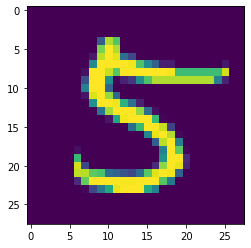

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(combx[52000].reshape(28,28))
print(comby[52000])

## Resnet

In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=False)
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
#plt.ion()   # interactive mode

In [ ]:
trnimgfile = '/content/'+dir_model+'/trn_img_f/0_trn_img.txt'
trnlabfile = '/content/'+dir_model+'/trn_lab_f/0_trn_lab.txt'

dec_x = np.loadtxt(trnimgfile) 
dec_y = np.loadtxt(trnlabfile)

print('train imgs before reshape ',dec_x.shape) 
print('train labels ',dec_y.shape) 
print(collections.Counter(dec_y))
dec_x = dec_x.reshape(dec_x.shape[0],1,28,28) 
print('train imgs after reshape ',dec_x.shape) 

tensor_x = torch.Tensor(dec_x)
tensor_y = torch.tensor(dec_y,dtype=torch.long)
dataset_bal = TensorDataset(tensor_x,tensor_y) 
train_loader = torch.utils.data.DataLoader(dataset_bal, batch_size=batch_size,shuffle=True,num_workers=num_workers)

train imgs before reshape  (77935, 784)
train labels  (77935,)
Counter({1.0: 8742, 7.0: 8265, 3.0: 8125, 9.0: 7946, 2.0: 7932, 6.0: 7899, 8.0: 7851, 4.0: 7840, 5.0: 7412, 0.0: 5923})
train imgs after reshape  (77935, 1, 28, 28)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [ ]:
print(torch.__version__)

1.11.0+cu113


In [ ]:
BATCH_SIZE = 32

## transformations
transform = transforms.Compose(
    [transforms.ToTensor()])

## download and load training dataset
if(args['dataset'] == 'mnist'):
  trainset = torchvision.datasets.MNIST(root='./data', train=True,download=True, transform=transform)
  testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

if(args['dataset']== 'fashionmnist'):
  trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,download=True, transform=transform)
  testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

trainloader = train_loader#torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,shuffle=True, num_workers=2)

## download and load testing dataset

testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


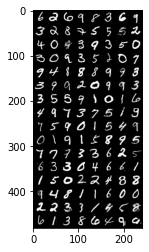

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

## show images
imshow(torchvision.utils.make_grid(images))

In [ ]:
for images, labels in trainloader:
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)
    break

Image batch dimensions: torch.Size([128, 1, 28, 28])
Image label dimensions: torch.Size([128])


In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        # 28x28x1 => 26x26x32
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.d1 = nn.Linear(26 * 26 * 32, 128)
        self.d2 = nn.Linear(128, 10)

    def forward(self, x):
        # 32x1x28x28 => 32x32x26x26
        x = self.conv1(x)
        x = F.relu(x)

        # flatten => 32 x (32*26*26)
        x = x.flatten(start_dim = 1)

        # 32 x (32*26*26) => 32x128
        x = self.d1(x)
        x = F.relu(x)

        # logits => 32x10
        logits = self.d2(x)
        out = F.softmax(logits, dim=1)
        return out

In [ ]:
## test the model with 1 batch
model = MyModel()
for images, labels in trainloader:
    print("batch size:", images.shape)
    out = model(images)
    print(out.shape)
    break

batch size: torch.Size([128, 1, 28, 28])
torch.Size([128, 10])


In [ ]:
learning_rate = 0.001
num_epochs = 5

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MyModel()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
## compute accuracy
def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [ ]:
#%%time
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    model = model.train()

    ## training step
    for i, (images, labels) in enumerate(trainloader):
        
        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = model(images)
        loss = criterion(logits, labels)
        optimizer.zero_grad()
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(logits, labels, batch_size)
        #print( get_accuracy(logits, labels, batch_size))
    
    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i)) 

Epoch: 0 | Loss: 1.7185 | Train Accuracy: 74.98
Epoch: 1 | Loss: 1.5399 | Train Accuracy: 92.76
Epoch: 2 | Loss: 1.4847 | Train Accuracy: 98.25
Epoch: 3 | Loss: 1.4788 | Train Accuracy: 98.76
Epoch: 4 | Loss: 1.4759 | Train Accuracy: 99.01


## Avaliação e Métricas

In [ ]:

test_acc = 0.0
outputs_array=[]
labels_array= []
for i, (images, labels) in enumerate(testloader, 0):
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    outputs_array.append(outputs)
    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)
        
print('Test Accuracy: %.2f'%( test_acc/i))

In [ ]:
from sklearn.metrics import f1_score

f1_score(outputs_array, labels, average='macro')

TypeError: ignored

In [ ]:
from imblearn.metrics import geometric_mean_score
geometric_mean_score(y_true, y_pred, average='macro')